In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
submission = pd.read_csv('sample_submission.csv')

In [6]:
import matplotlib.pyplot as plt

In [2]:
train.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [21]:
train.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,연도,월,일,주차
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000,23011.000000,23011.000000,23011.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419,1990.999305,6.522880,15.729781,26.591022
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515,18.184835,3.448792,8.800344,15.062916
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000,1960.000000,1.000000,1.000000,1.000000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000,1975.000000,4.000000,8.000000,14.000000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000,1991.000000,7.000000,16.000000,27.000000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000,2007.000000,10.000000,23.000000,40.000000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000,2022.000000,12.000000,31.000000,53.000000


C:\Users\taeho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


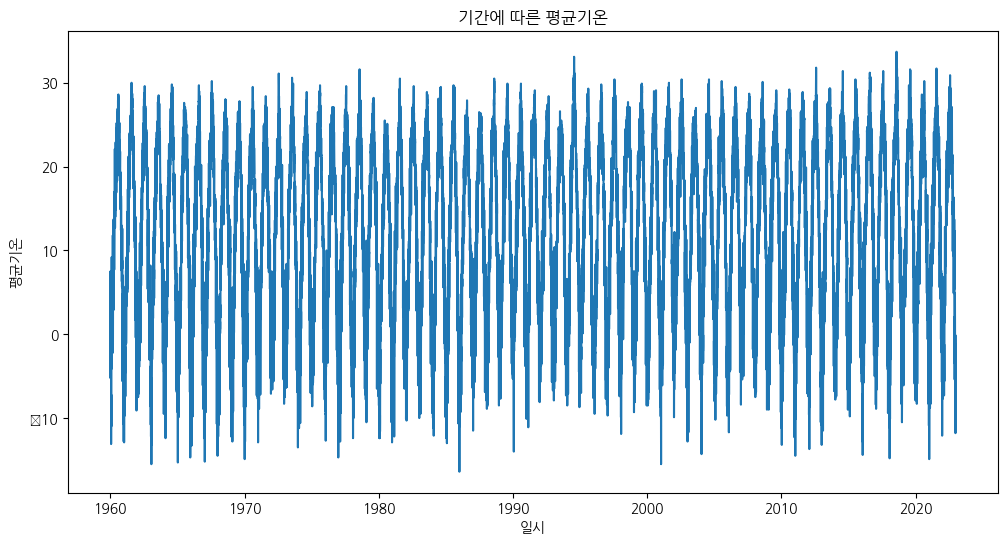

In [25]:
import matplotlib.pyplot as plt

# 전체 기간의 기온 시각화
plt.figure(figsize=(12, 6))
plt.plot(train['일시'], train['평균기온'])
plt.title('기간에 따른 평균기온')
plt.xlabel('일시')
plt.ylabel('평균기온')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller

# ADF 검정
result = adfuller(train['평균기온'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.619186
p-value: 0.000000


평균기온은 정상성을 따르는 것으로 보아 따로 차분을 하지 않은 상태에서 시계열 모형을 적용해도 문제없을 것으로 보임

In [4]:
# '일시' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# 연도, 월, 일 열 생성
train['연도'] = train['일시'].dt.year
train['월'] = train['일시'].dt.month
train['일'] = train['일시'].dt.day

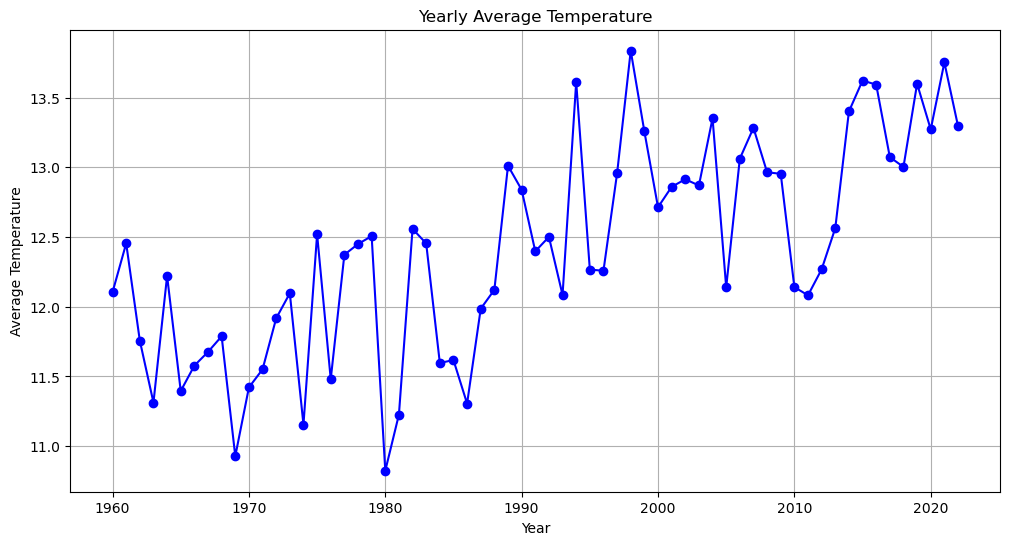

In [7]:
# 연도별 평균기온 계산
yearly_avg_temp = train.groupby('연도')['평균기온'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', color='b')
plt.title('Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

연도별 평균기온은 올라가는 추세를 확인할 수 있다.(지구온난화 영향)

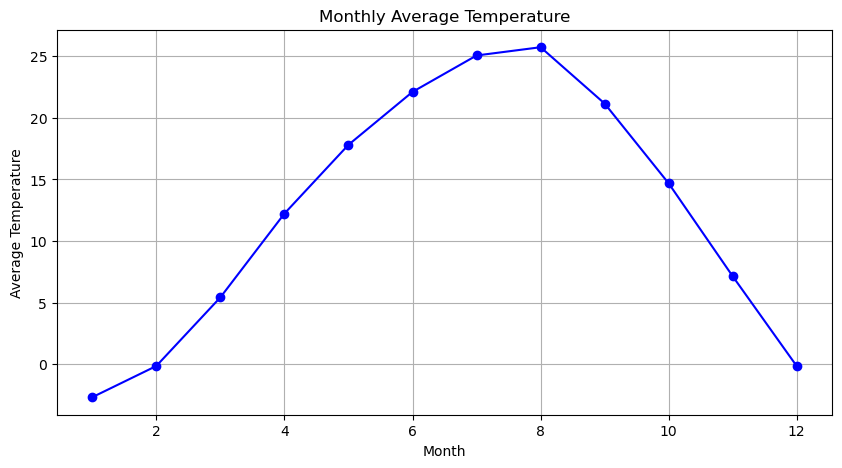

In [8]:
import matplotlib.pyplot as plt

# 월별 평균기온 계산
monthly_avg_temp = train.groupby('월')['평균기온'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 5))
monthly_avg_temp.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()


확실히 여름에 기온이 가장 높고 12-2월달에 평균기온이 낮은 것을 확인할 수 있다. ->이를 통해 계절이라는 새로운 변수 만드는 것 괜찮아 보임
예)12-2월:겨울, 3-5월:봄, 6-8월:여름, 7-9월:가을

In [9]:
import pandas as pd

# '일시' 열을 datetime 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# '일시' 열에서 주차 정보 추출
train['주차'] = train['일시'].dt.isocalendar().week

# 결과 확인
print(train[['일시', '주차']])


              일시  주차
0     1960-01-01  53
1     1960-01-02  53
2     1960-01-03  53
3     1960-01-04   1
4     1960-01-05   1
...          ...  ..
23006 2022-12-27  52
23007 2022-12-28  52
23008 2022-12-29  52
23009 2022-12-30  52
23010 2022-12-31  52

[23011 rows x 2 columns]


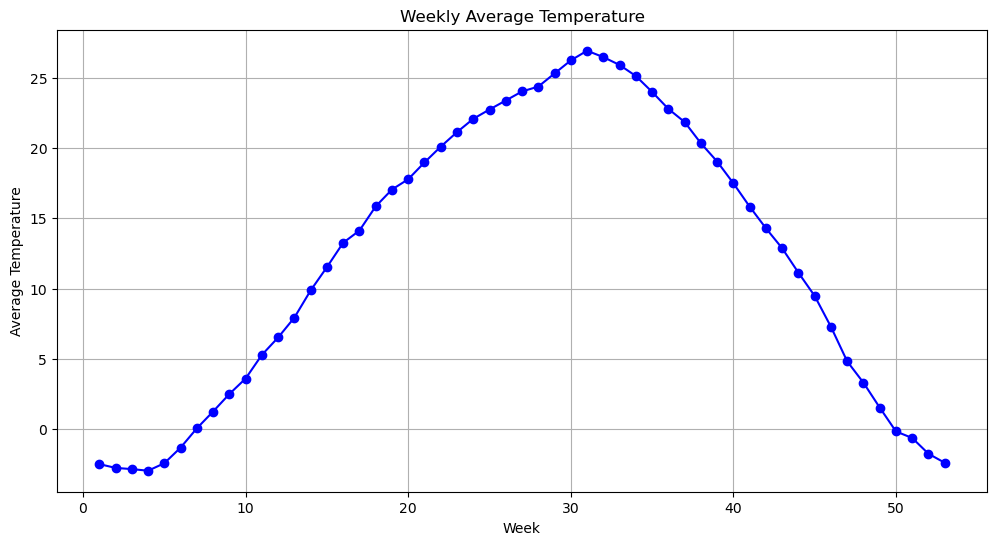

In [10]:
import matplotlib.pyplot as plt

# 주차별 평균기온 계산
weekly_avg_temp = train.groupby('주차')['평균기온'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg_temp.index, weekly_avg_temp, marker='o', linestyle='-', color='b')
plt.title('Weekly Average Temperature')
plt.xlabel('Week')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

In [11]:
# 결측치 확인
missing_values = train.isnull()

# 각 열별로 결측치 개수 세기
missing_count_per_column = missing_values.sum()

# 결과 출력
print(missing_count_per_column)


일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
연도          0
월           0
일           0
주차          0
dtype: int64


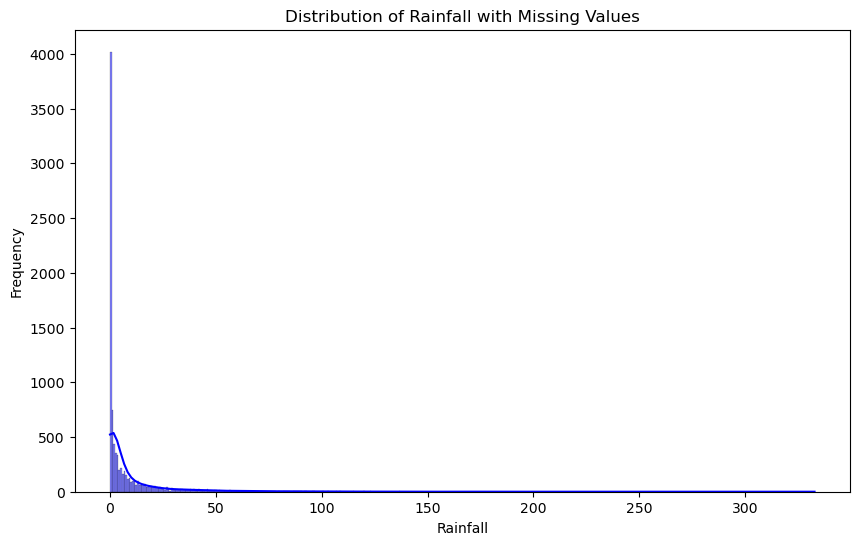

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치가 있는 경우의 '강수량' 분포
plt.figure(figsize=(10, 6))
sns.histplot(train.loc[train['강수량'].notnull(), '강수량'], kde=True, color='blue')
plt.title('Distribution of Rainfall with Missing Values')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

-0쪽으로 치우쳐저 있는 것을 확인할 수 있고 향후 로그변환을 실시하는 방법이 고려됨
-결측값이 너무 많아서 그냥 평균값으로 대체할지 아니면 강수량 변수 자체를 아예 고려 안할지 고민됨

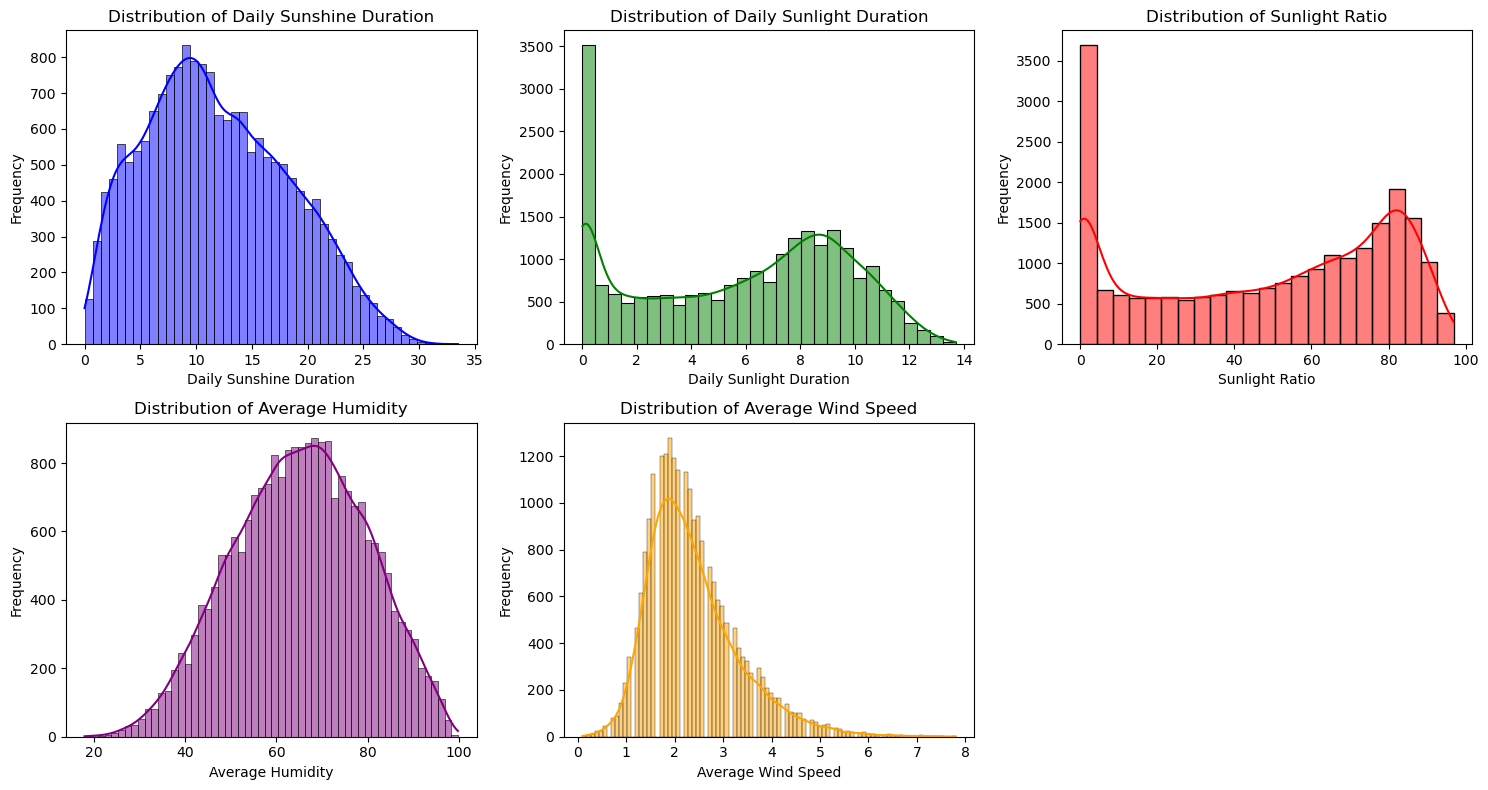

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# '일사합' 분포
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.histplot(train['일사합'].dropna(), kde=True, color='blue')
plt.title('Distribution of Daily Sunshine Duration')
plt.xlabel('Daily Sunshine Duration')
plt.ylabel('Frequency')

# '일조합' 분포
plt.subplot(2, 3, 2)
sns.histplot(train['일조합'].dropna(), kde=True, color='green')
plt.title('Distribution of Daily Sunlight Duration')
plt.xlabel('Daily Sunlight Duration')
plt.ylabel('Frequency')

# '일조율' 분포
plt.subplot(2, 3, 3)
sns.histplot(train['일조율'].dropna(), kde=True, color='red')
plt.title('Distribution of Sunlight Ratio')
plt.xlabel('Sunlight Ratio')
plt.ylabel('Frequency')

# '평균습도' 분포
plt.subplot(2, 3, 4)
sns.histplot(train['평균습도'].dropna(), kde=True, color='purple')
plt.title('Distribution of Average Humidity')
plt.xlabel('Average Humidity')
plt.ylabel('Frequency')

# '평균풍속' 분포
plt.subplot(2, 3, 5)
sns.histplot(train['평균풍속'].dropna(), kde=True, color='orange')
plt.title('Distribution of Average Wind Speed')
plt.xlabel('Average Wind Speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


다른 수치형 변수들을 보았을 때는 굳이 정규화를 시켜야할 필요성을 느끼지는 않았다.

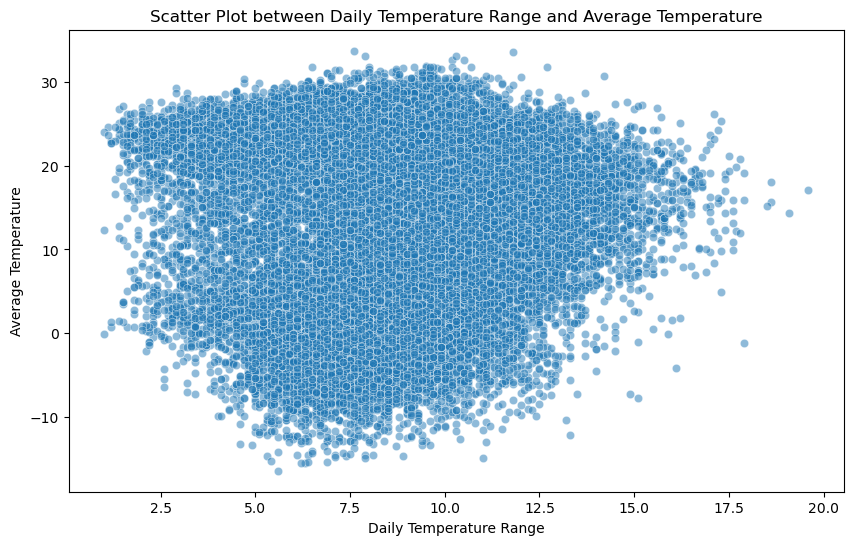

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# '일교차'와 '평균기온' 사이의 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x='일교차', y='평균기온', data=train, alpha=0.5)
plt.title('Scatter Plot between Daily Temperature Range and Average Temperature')
plt.xlabel('Daily Temperature Range')
plt.ylabel('Average Temperature')
plt.show()


In [19]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

일교차와 평균기온의 관계를 확인해 보았는데 특별한 관계는 보이지 않았다 - 일교차 변수를 빼야하냐는 생각이 들었다.

C:\Users\taeho\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\taeho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


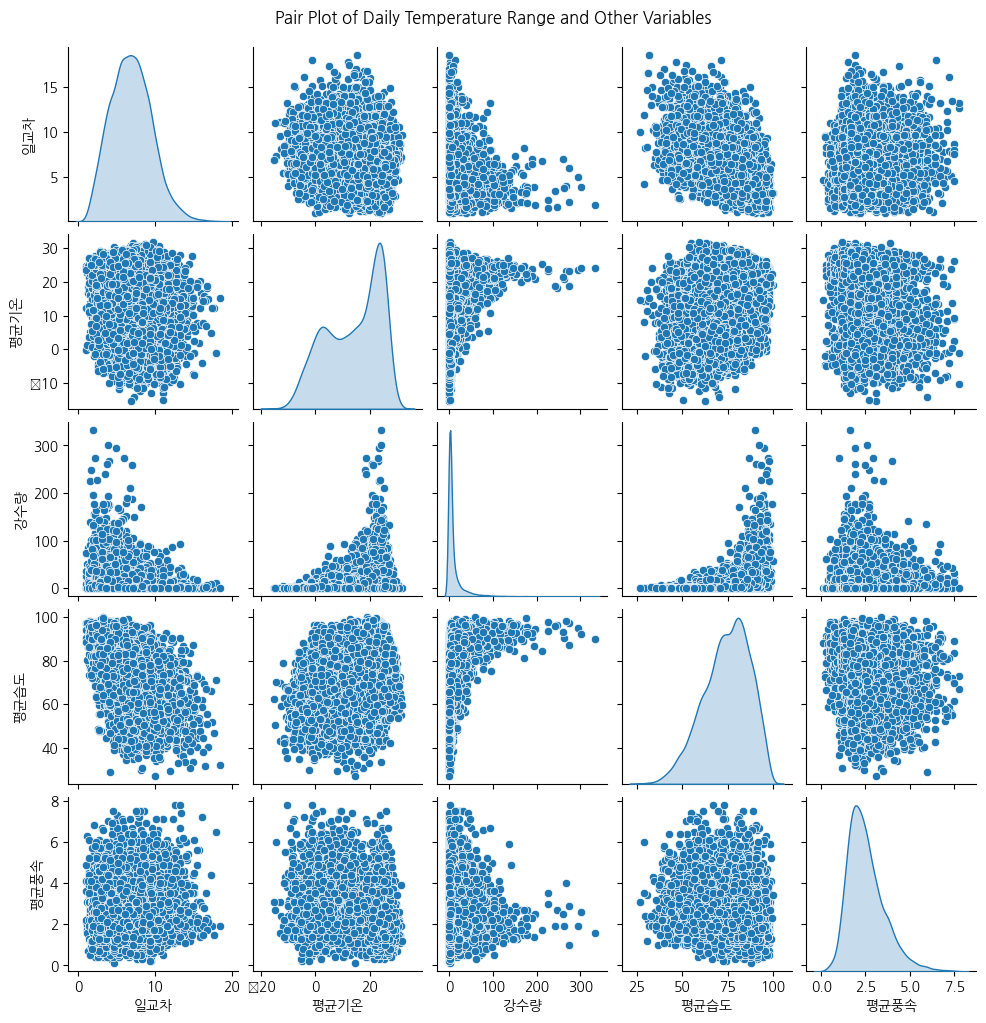

In [20]:
import seaborn as sns

# 일교차, 평균기온, 강수량, 평균습도, 평균풍속 간의 pair plot
selected_columns = ['일교차', '평균기온', '강수량', '평균습도', '평균풍속']
sns.pairplot(train[selected_columns].dropna(), diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Daily Temperature Range and Other Variables', y=1.02)
plt.show()

평균기온과 다른 변수들과의 관계를 살펴보았을 때 강수량을 제외하고는 비슷한 양상을 보였다.(특별한 관계가 파악이 되지 않음)
강수량은 늘어날수록 평균기온의 분산이 줄어드는 것을 확인할 수 있다. ->강수량이 변수로 쓰일 가능성이 있다 생각함

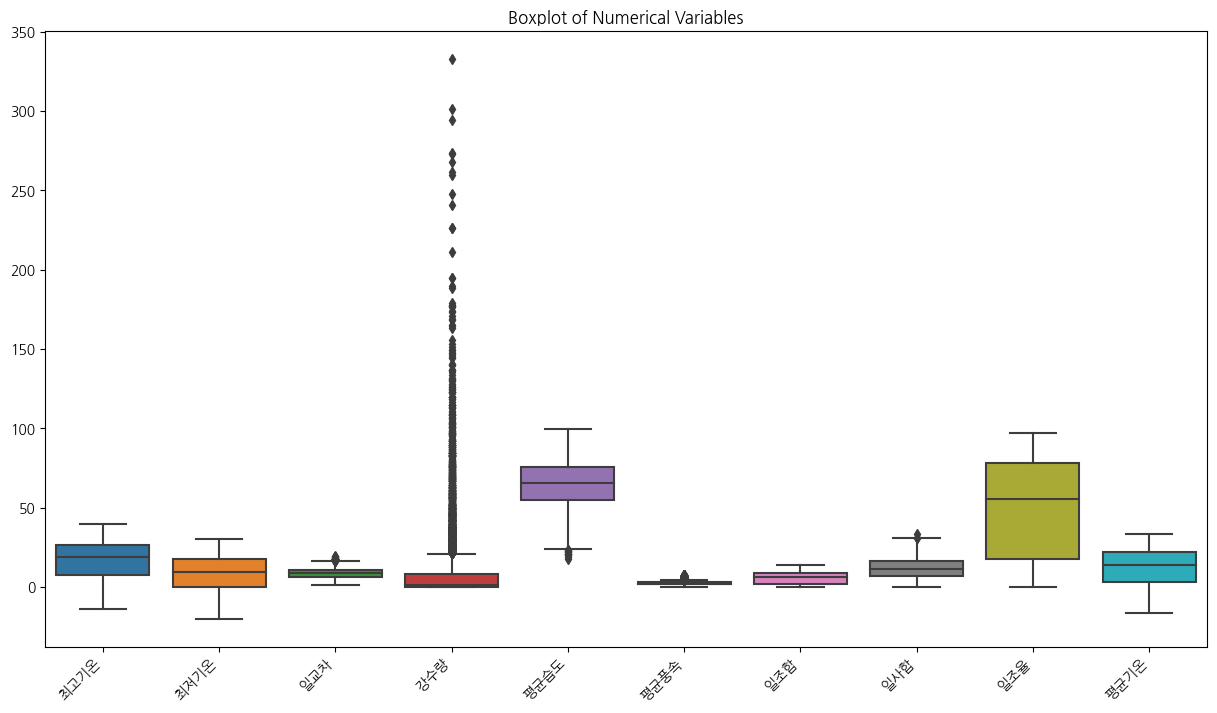

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# train 데이터에서 수치형 변수만 선택
numerical_columns = train.select_dtypes(include=['float64']).columns

# 수치형 변수들에 대한 boxplot 그리기
plt.figure(figsize=(15, 8))
sns.boxplot(data=train[numerical_columns])
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45, ha='right')
plt.show()


-그런데 강수량이 평균기온이랑 연관이 있는 것처럼 보였지만 강수량 변수 자체가 이상치가 너무 많아서 이상치를 제거하여 사용하기도 문제가 됨
-강수량을 변수로 사용하기에는 문제가 된다고 판단됨

C:\Users\taeho\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\taeho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


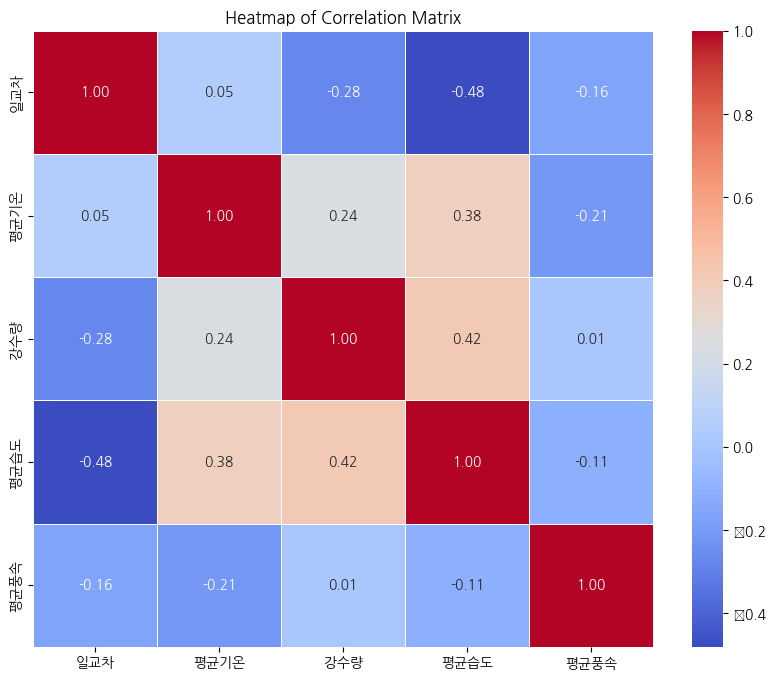

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 일교차, 평균기온, 강수량, 평균습도, 평균풍속 간의 상관 계수 행렬
selected_columns = ['일교차', '평균기온', '강수량', '평균습도', '평균풍속']
correlation_matrix = train[selected_columns].corr()

# Heatmap으로 상관 계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


오히려 평균기온과 가장 상관관계가 높은 것은 강수량이 아닌 평균습도였다. 그렇지만 산점도를 보았을 때 평균습도와 크게 연관성이 있는것으로는 
보이지 않아 변수로 쓰일지는 미지수

-현재까지 사용될 변수: 년도,월,주차,계절